# Método de Newton multidimensional
Pablo Zamora, Erick Guerra, Diego Morales Aquino

In [1]:
import numpy as np
from scipy.optimize import approx_fprime
import matplotlib.pyplot as plt
from itertools import product

In [2]:
def calc_derivadas_parciales(f, x0):
    grad = np.zeros(len(x0))
    for i in range(len(x0)):
        grad[i] = approx_fprime(x0, lambda x: f(x))[i]
    return grad

In [3]:
def newton(F, x0, max_iter, tol):

  for i in range(max_iter):
    
    F_x0 = np.array([f(x0) for f in F])
    dF_x0 = np.array([calc_derivadas_parciales(f, x0) for f in F])
    dF_x0_inv = np.linalg.inv(dF_x0)

    x0 = x0 - np.matmul(dF_x0_inv, F_x0)
    F_x0 = np.array([f(x0) for f in F])

    #print(f"Iteración {i}: x = {x0}")

    # Condición de parada de tolerancia
    if np.linalg.norm(F_x0, ord=F_x0.shape[0]) < tol:
      break

  return x0

In [4]:
def plot_vector_field(F_vector, x_range, y_range, grid_size=20, figsize=(10, 10), dpi=100, points=None):
    F = lambda x: [f(x) for f in F_vector]
    
    # Crear un grid de puntos en el espacio xy
    x = np.linspace(x_range[0], x_range[1], grid_size)
    y = np.linspace(y_range[0], y_range[1], grid_size)
    X, Y = np.meshgrid(x, y)

    # Inicializar matrices
    U = np.zeros_like(X)
    V = np.zeros_like(Y)

    # Calcular las componentes de F(x, y)
    for i in range(grid_size):
        for j in range(grid_size):
            vec = F([X[i, j], Y[i, j]])
            U[i, j] = vec[0]
            V[i, j] = vec[1]

    # Configurar el tamaño de la figura y la resolución
    plt.figure(figsize=figsize, dpi=dpi)
    
    # Dibujar el campo vectorial
    plt.quiver(X, Y, U, V, color='blue')
    
    # Si se proporcionan puntos, marcarlos en el gráfico
    if points is not None:
        points = np.array(points)
        plt.scatter(points[:, 0], points[:, 1], color='red', marker='o', label='Ceros')
    
    plt.title('Campo Vectorial')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
def generate_points(n, step, min_val, max_val):
    """
    Genera puntos en un espacio de n dimensiones con un salto específico,
    considerando un límite mínimo y máximo para cada dimensión.
    
    Parámetros:
    - n (int): Número de dimensiones.
    - step (float): Tamaño del salto entre puntos.
    - min_val (float): Límite mínimo para cada dimensión.
    - max_val (float): Límite máximo para cada dimensión.
    
    Retorna:
    - np.ndarray: Un arreglo de puntos en n dimensiones.
    """
    # Generar un rango de puntos en cada dimensión dentro de los límites especificados
    ranges = [np.arange(min_val, max_val + step, step) for _ in range(n)]
    
    # Usar el producto cartesiano para obtener todos los puntos
    points = np.array(list(product(*ranges)))
    
    return points


### Ejercicio 2.1

In [6]:
F = [
    lambda x: 3*x[0]**2 - x[1]**2,
    lambda x: 3*x[0]*x[1]**2 - x[0]**3 - 1,
]

# Puntos iniciales
initial_points = generate_points(n=len(F), step= 10, min_val=-100, max_val=100)
zeros = set()

for point in initial_points:

    try:
        x0 = np.array(point)
        x = newton(F, x0, 100, 1e-16)
    except:
        continue

    zeros.add(tuple(np.round(x, 7)))

In [7]:
print("Ceros de F:\n",'\n'.join(map(str, zeros)), sep="")

Ceros de F:
(0.5, -0.8660254)
(0.5, 0.8660254)


In [8]:
# Evaluar F en puntos de convergencia
for zero in zeros:
    print(f"F({zero}) = {[f(zero) for f in F]}")

F((0.5, -0.8660254)) = [6.5548401151360736e-09, -9.832260117192959e-09]
F((0.5, 0.8660254)) = [6.5548401151360736e-09, -9.832260117192959e-09]


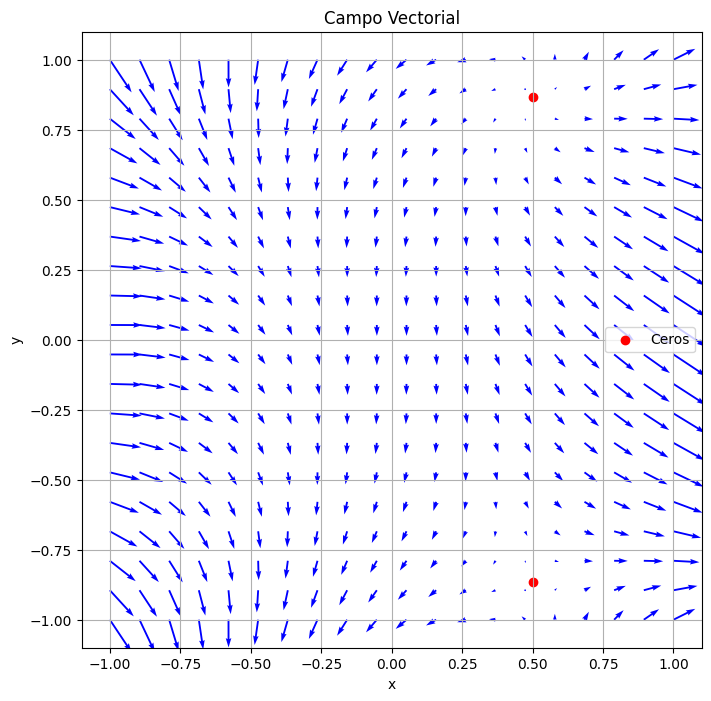

In [9]:
# Graficar campo de vectores
x_range = (-1, 1)
y_range = (-1, 1)

# Graficar el campo vectorial
plot_vector_field(F, x_range, y_range, figsize=(8,8), dpi=100, points=list(zeros))

### Ejercicio 2.2

In [10]:
F = [
    lambda x: 12*x[0] - 3*x[1]**2 -4*x[2] - 7.17,
    lambda x: x[0] + 10*x[1] - x[2] - 11.54,
    lambda x: x[1]**3 - 7*x[2]**3 - 7.631,
]

# Puntos iniciales
initial_points = generate_points(n=len(F), step= 2000, min_val=-10000, max_val=10000)
zeros = set()

for point in initial_points:

    try:
        x0 = np.array(point)
        x = newton(F, x0, 100, 1e-16)
    except:
        continue

    zeros.add(tuple(np.round(x, 7)))

C:\Users\diego\AppData\Local\Temp\ipykernel_15452\3607515478.py:4: RuntimeWarning: overflow encountered in scalar multiply
  lambda x: x[1]**3 - 7*x[2]**3 - 7.631,
C:\Users\diego\AppData\Local\Temp\ipykernel_15452\3607515478.py:4: RuntimeWarning: overflow encountered in scalar subtract
  lambda x: x[1]**3 - 7*x[2]**3 - 7.631,


In [13]:
print("Ceros de F:\n",'\n'.join(map(str, zeros)), sep="")

Ceros de F:
(0.5221282, 1.0036301, -0.9815705)
(387.8635023, -39.708213, -20.7586277)


In [14]:
# Evaluar F en puntos de convergencia
for zero in zeros:
    print(f"F({zero}) = {[f(zero) for f in F]}")

F((0.5221282, 1.0036301, -0.9815705)) = [2.671219707650607e-07, -2.9999999640040187e-07, -8.600129834945847e-07]
F((387.8635023, -39.708213, -20.7586277)) = [-5.601069101857092e-07, -1.0658141036401503e-14, 0.00029545465199021237]
